<a href="https://colab.research.google.com/github/Aleksey128/Numpy_solutions.ipynb/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%BE%D0%B2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение. Постановка целей и задач.

Целью исследования является разработка точной модели прогнозирования временного ряда спроса на продукты для данного набора данных.

Цель исследования - дать представление о будущем поведении переменной 'Demand', что может помочь в принятии обоснованных решений, связанных с управлением запасами, ценообразованием и прогнозированием продаж.


---


Задачи:

*   Предварительно обработать набор данных и убедиться, что он подходит для анализа временных рядов.

*   Выявить закономерности и тенденции в переменной 'Demand', используя методы анализа данных.

*   Оценить стационарность переменной 'Demand' и применить соответствующие методы, такие как сезонное разложение и построение графиков автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF).

*   Определить и применить подходящие модели прогнозирования временных рядов для переменных 'Demand', включая ARIMA, SARIMA.

*   Обучить и проверить выбранные модели на наборе данных и оценить их эффективность с помощью соответствующих оценочных показателей, таких как средняя абсолютная ошибка (MAE) или средняя квадратичная ошибка (RMSE).

*   Представить выводы и рекомендации на основе результатов исследования, которые могут помочь в улучшении управления запасами, ценообразования и прогнозирования продаж в будущем.

**Импорт библиотек**

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller                # для теста Дики-Фуллера

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

**Загрузка датасета и знакомство с ним**

In [ ]:
#Скачивание файла
!wget https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv

--2023-05-04 05:32:30--  https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2988010 (2.8M) [text/plain]
Saving to: ‘retail_2products.csv’

retail_2products.cs 100%[===================>]   2.85M  --.-KB/s    in 0.07s   

2023-05-04 05:32:30 (40.7 MB/s) - ‘retail_2products.csv’ saved [2988010/2988010]



In [ ]:
#Считывание файла
df =  pd.read_csv('retail_2products.csv', sep=';', index_col='Date', parse_dates=True)
df

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Date,,,,,,
2015-01-01,1,1,NaN,22.0,163.78,NaN
2015-01-02,1,1,NaN,41.0,163.78,NaN
2015-01-03,1,1,NaN,35.0,163.78,NaN
2015-01-04,1,1,NaN,72.0,163.78,NaN
2015-01-05,1,1,NaN,25.0,163.78,NaN
...,...,...,...,...,...,...
2016-06-15,110,2,NaN,NaN,133.06,NaN
2016-06-16,110,2,NaN,NaN,133.06,NaN
2016-06-17,110,2,NaN,NaN,133.06,NaN


In [ ]:
df.corr()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Store_id,1.000000,-0.006404,NaN,-0.073796,-0.057819,-0.044708
SKU_id,-0.006404,1.000000,NaN,-0.481500,0.312427,-0.682432
Promo,NaN,NaN,NaN,NaN,NaN,NaN
Demand,-0.073796,-0.481500,NaN,1.000000,-0.240673,0.235854
Regular_Price,-0.057819,0.312427,NaN,-0.240673,1.000000,0.244496
Promo_Price,-0.044708,-0.682432,NaN,0.235854,0.244496,1.000000


In [ ]:
#Количество строк и столбцов
df.shape

(92886, 6)

In [ ]:
#Названия столцов
#Стоит обратить внимание что сюда не попал столбец 'Date' т.к. он установлен в качестве индекса при считывании файла
df.columns

Index(['Store_id', 'SKU_id', 'Promo', 'Demand', 'Regular_Price',
       'Promo_Price'],
      dtype='object')

In [ ]:
#Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92886 entries, 2015-01-01 to 2016-06-19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store_id       92886 non-null  int64  
 1   SKU_id         92886 non-null  int64  
 2   Promo          16863 non-null  float64
 3   Demand         86916 non-null  float64
 4   Regular_Price  92886 non-null  float64
 5   Promo_Price    16863 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 5.0 MB


In [ ]:
#Описательная статистика
df.describe()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
count,92886.000000,92886.000000,16863.0,86916.000000,92886.000000,16863.000000
mean,44.665536,1.497039,1.0,193.088695,138.942336,120.022617
std,26.368977,0.499994,0.0,366.859645,8.984347,9.647023
min,1.000000,1.000000,1.0,0.000000,121.640000,100.300000
25%,22.000000,1.000000,1.0,3.000000,131.700000,116.610000
50%,44.000000,1.000000,1.0,72.000000,138.500000,119.600000
75%,66.000000,2.000000,1.0,226.000000,142.570000,125.040000
max,110.000000,2.000000,1.0,9686.000000,176.820000,143.800000


Вывод датасет это набор даннах состоящий из 7 столбцов и 92886 строк

**Очистка данных**

In [ ]:
#Количество отсутствующих и нулевых значений
df.isnull().sum()

Store_id             0
SKU_id               0
Promo            76023
Demand            5970
Regular_Price        0
Promo_Price      76023
dtype: int64

In [ ]:
#Процент отсутствующих и нулевых значений
df.isnull().mean() * 100

Store_id          0.000000
SKU_id            0.000000
Promo            81.845488
Demand            6.427233
Regular_Price     0.000000
Promo_Price      81.845488
dtype: float64

In [ ]:
#Удаление столбцов и пустых строк
from pandas.io.formats.style_render import Subset
df.drop(['Promo', 'Promo_Price', 'Regular_Price', 'Store_id', 'SKU_id'], axis=1, inplace=True)
df.dropna(subset=['Demand'], inplace=True)

df.isnull().sum()

Demand    0
dtype: int64

**Выводы:**
Первоночальное знакомство с данными, фильтрация и обработка пропусков.

Набор данных содержит информацию о продажах товаров в различных магазинах за определенный период времени. Вероятно, набор данных содержит информацию об идентификаторах товаров, идентификаторах магазинов, обычных и акционных ценах, а также о количестве товаров, проданных за разные периоды времени.

Учитывая размер датасета, то, что мы будем исследовать спрос и регулярную цену, а так же то что процент незаполненых строк в столце 'Demand' состовляет 6,5%. Мы можем исключить из датасета столбцы 'Regular_Price', 'Promo' и 'Promo_Price' и незаполненые строки в столбце 'Demand'.

# EDA или разведочный анализ данных.

**Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.**

[]

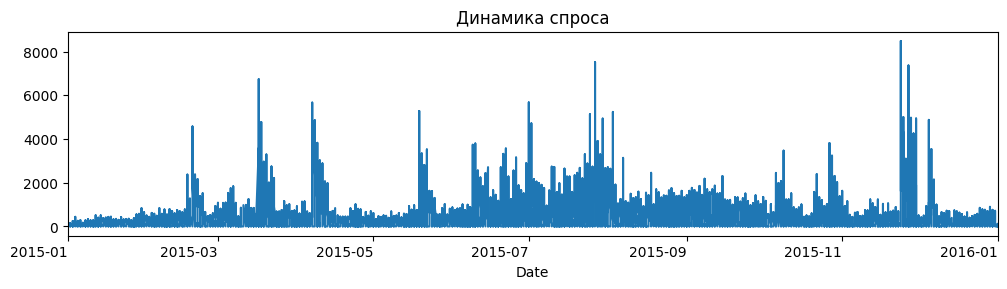

In [ ]:
#Построение графика динамики спроса
ax_Demand = df['Demand']['2015-01-01':'2016-01-01'].plot(figsize=(12,3), title='Динамика спроса')
ax_Demand.autoscale(axis='x', tight = True)

plt.xticks(rotation=0)
plt.plot()

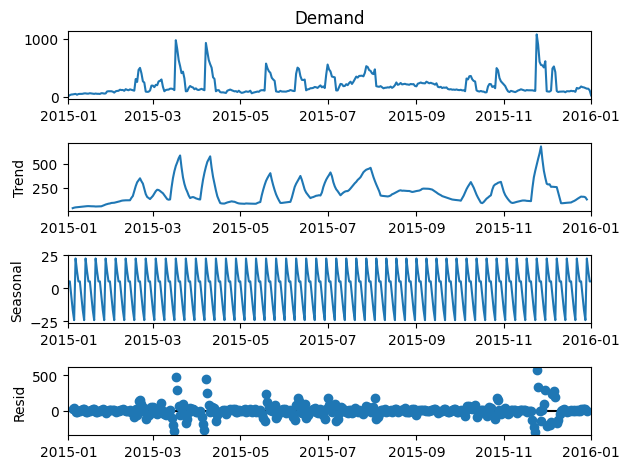

In [ ]:
#Разложение спроса на сезонные компоненты 
ets_decompose = seasonal_decompose(df.resample('D').mean()['Demand']['2015-01-01':'2016-01-01'], model='additive')
ets_decompose.plot();

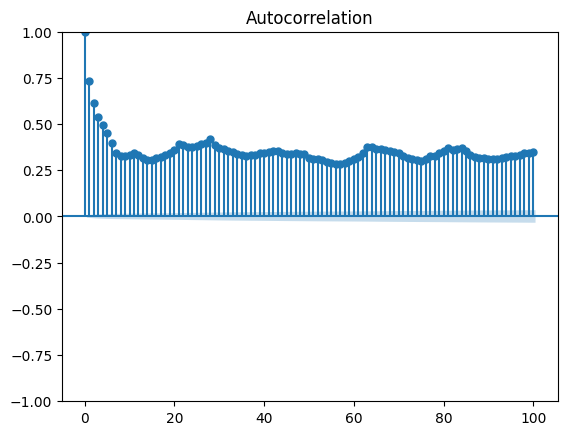

In [ ]:
#График автокорреляции
plot_acf(df['Demand'], lags=100);

На графике автокорреляции видны скачки за пределами доверительного интервала, это говорит о наличии сезонной или иной закономерности.

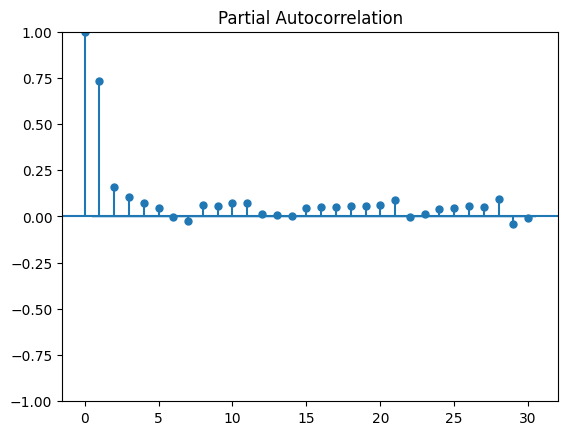

In [ ]:
#График частичной автокорреляции
plot_pacf(df['Demand'], lags=30);

График частичной автокорреляции не показывает значительных пиков после первых лагов, это говорит об отсутствии авторегрессионного компонента и возможности использования модели скользящего среднего.

In [ ]:
#Разделение выборки на тестовую и обучающую случайным образом
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=123)


**Применение SARIMA для прогнозирования**

In [ ]:
auto_arima(df['Demand'], seasonal = True, m = 12).summary()

In [ ]:
model = SARIMAX(train['Demand'], order = (2, 0, 0))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                69532
Model:               SARIMAX(2, 0, 0)   Log Likelihood             -514858.109
Date:                Tue, 02 May 2023   AIC                        1029722.217
Time:                        06:20:29   BIC                        1029749.666
Sample:                             0   HQIC                       1029730.686
                              - 69532                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1777      0.003     64.879      0.000       0.172       0.183
ar.L2          0.1773      0.003     64.659      0.000       0.172       0.183
sigma2      1.582e+05    174.140    908.260      0.000    1.58e+05    1.59e+05
===================================================================================
Ljung-Box (L1) (Q):                1323.52   Jarque-Bera (JB):           8152517.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             5.00
Prob(H) (two-sided):                  0.29   Kurtosis:                        55.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

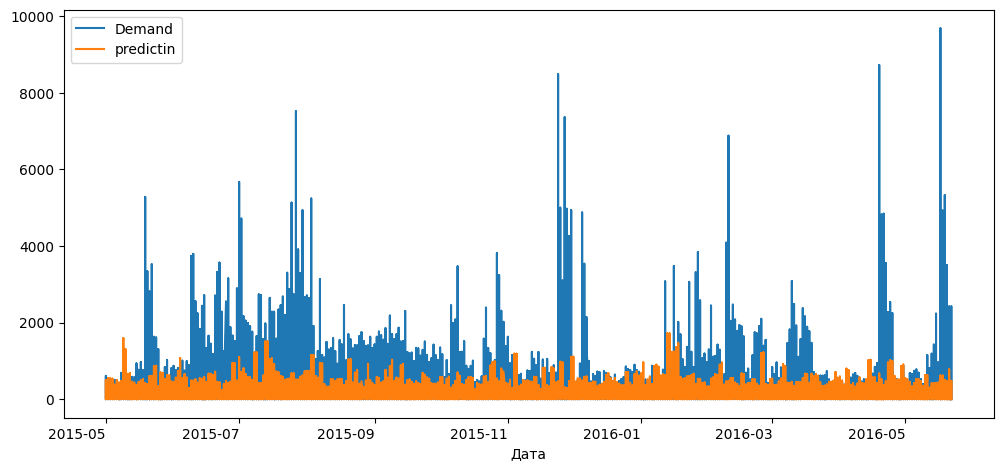

In [ ]:
train = df.loc[:'2015-04-25', 'Demand']
test = df.loc['2015-05-01':, 'Demand']
start = len(train)
end = len(train) + len(test) - 1
forecast = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2, 0, 0)')
prediction = pd.DataFrame(data=forecast.values, index=test.index, columns=['predictin'])

ax = test['Demand'].plot(figsize=(12, 6), legend=True, title = '')
prediction.plot(figsize=(12, 6), legend=True, ax=ax)

plt.xticks(rotation=0)
_=plt.xlabel('Дата')
_=plt.ylabel('')

In [ ]:
mse = mean_squared_error(test['Demand'], prediction)
rmse = m.sqrt(mse)
mape = mean_absolute_percentage_error(test['Demand'], prediction)

print(f'MSE Error:{mse:2}')
print(f'RMSE Error:{rmse:2}')
print(f'MAPE Error:{mape:2}')


MSE Error:174183.97690320367
RMSE Error:417.3535394640899
MAPE Error:1617284050729.4414


In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Find the optimal parameters using the auto_arima function
model = auto_arima(train['Demand'].sample(n=1000), start_p=0, start_q=0,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

# Fit the SARIMAX model on the training data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

# Forecast future values
predictions = fit_model.forecast(steps=2000)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=15730.338, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15123.817, Time=1.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=15453.041, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=15028.023, Time=4.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=15285.041, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=14922.313, Time=4.32 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=15016.840, Time=1.56 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.18 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.69 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=11.83 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=i

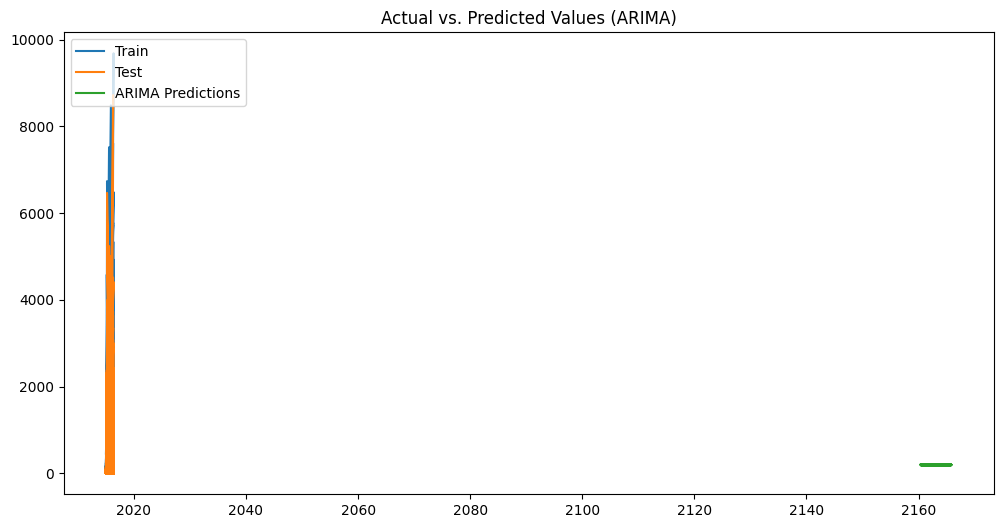

In [ ]:
# Plot actual data and predicted values
plt.figure(figsize=(12,6))
plt.plot(train['Demand'].index, train, label='Train')
plt.plot(test['Demand'].index, test, label='Test')
plt.plot(predictions.index, predictions, label='ARIMA Predictions')
plt.legend(loc='upper left')
plt.title('Actual vs. Predicted Values (ARIMA)')
plt.show()

In [ ]:
mse = mean_squared_error(test['Demand'], prediction)
rmse = m.sqrt(mse)
mape = mean_absolute_percentage_error(test['Demand'], prediction)

print(f'MSE Error:{mse:2}')
print(f'RMSE Error:{rmse:2}')
print(f'MAPE Error:{mape:2}')

MSE Error:174183.97690320367
RMSE Error:417.3535394640899
MAPE Error:1617284050729.4414


**Модель Хольта-Винтерса**

<Axes: title={'center': 'Актуальная и прогнозируемая цена на Close'}, xlabel='Date', ylabel='USD'>

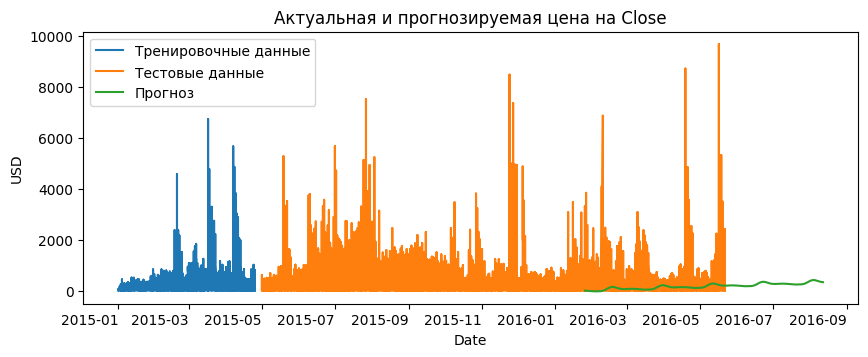

In [ ]:
train = df.loc[:'2015-04-25', 'Demand']
test = df.loc['2015-05-01':, 'Demand']

# Подготовка модели
model = ExponentialSmoothing(train, seasonal_periods=42, trend='add', seasonal='add')
fit_model = model.fit()

# Прогнозирование будующих значений
predictions = fit_model.forecast(200)


# Построение графика
plt.figure(figsize=(10,4))
plt.title('Актуальная и прогнозируемая цена на Close')
plt.ylabel('USD')
train.plot(legend=True, label='Тренировочные данные')
test.plot(legend=True, label='Тестовые данные')
predictions.plot(legend=True, label='Прогноз')

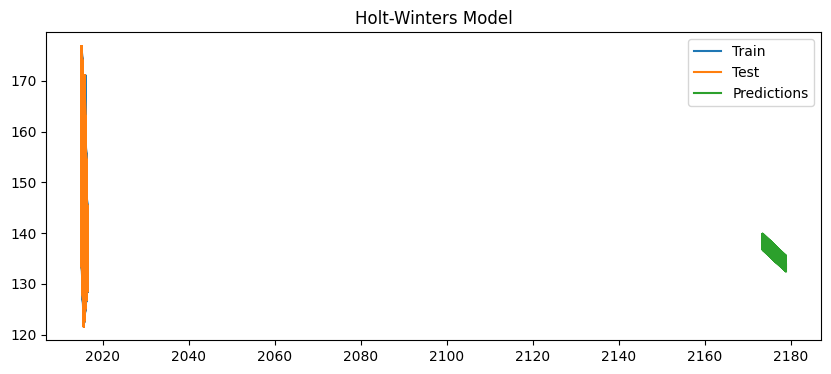

In [ ]:
# Подгонка модели к обучающим данным
model = ExponentialSmoothing(train['Regular_Price'], seasonal_periods=7, trend='mul', seasonal='mul')
fit_model = model.fit()

predictions = fit_model.forecast(2000)


# Постройте график прогнозов и фактических значений
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Regular_Price'], label='Train')
plt.plot(test.index, test['Regular_Price'], label='Test')
plt.plot(predictions.index, predictions, label='Predictions')



plt.legend(loc='best')
plt.title('Holt-Winters Model')
plt.show()